<a href="https://colab.research.google.com/github/sanykta/northwind/blob/main/Python_PG_Assignment_Sanyukta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# Data quality and preperation
# Data cleaning and evaluation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
cr= pd.read_csv('/content/cards_data.csv')

In [8]:
tr=pd.read_csv('/content/transactions_data.csv')

In [9]:
ur=pd.read_csv('/content/users_data.csv')

In [10]:
tr.head()

,id,date,client_id,card_id,amount,use_chip,merchant_id,merchant_city,merchant_state,zip,mcc,errors
0,7475509,2010-01-01 04:45:00,1718,4706,$46.21,Online Transaction,15143,ONLINE,NaN,NaN,4784,NaN
1,7475582,2010-01-01 06:03:00,511,974,$3.33,Swipe Transaction,20519,Phoenix,AZ,85015.0,5942,NaN
2,7475752,2010-01-01 06:52:00,1718,2029,$10.60,Swipe Transaction,20519,Spring Valley,CA,91977.0,5942,NaN
3,7475819,2010-01-01 07:08:00,511,1038,$21.50,Swipe Transaction,79038,Phoenix,AZ,85015.0,7538,NaN
4,7475828,2010-01-01 07:09:00,1094,3755,$80.00,Swipe Transaction,27092,Boyne City,MI,49712.0,4829,NaN


In [11]:
ur.head()

,id,current_age,retirement_age,birth_year,birth_month,gender,address,latitude,longitude,per_capita_income,yearly_income,total_debt,credit_score,num_credit_cards
0,825,53,66,1966,11,Female,462 Rose Lane,34.15,-117.76,$29278,$59696,$127613,787,5
1,1746,53,68,1966,12,Female,3606 Federal Boulevard,40.76,-73.74,$37891,$77254,$191349,701,5
2,1718,81,67,1938,11,Female,766 Third Drive,34.02,-117.89,$22681,$33483,$196,698,5
3,708,63,63,1957,1,Female,3 Madison Street,40.71,-73.99,$163145,$249925,$202328,722,4
4,1164,43,70,1976,9,Male,9620 Valley Stream Drive,37.76,-122.44,$53797,$109687,$183855,675,1


In [12]:
cr.head()

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,3701,825,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,42,825,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,4659,825,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No


In [13]:
cr.dtypes

,0
id,int64
client_id,int64
card_brand,object
card_type,object
card_number,int64
expires,object
cvv,int64
has_chip,object
num_cards_issued,int64
credit_limit,object


In [14]:
tr.dtypes

,0
id,int64
date,object
client_id,int64
card_id,int64
amount,object
use_chip,object
merchant_id,int64
merchant_city,object
merchant_state,object
zip,float64


In [15]:
def to_float(df, col):
    df[col] = (
        df[col]
        .astype(str)
        .str.replace('$','',regex=False)
        .str.replace(',','',regex=False)
        .str.strip()
    )
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [16]:
## changing $ to float numberial value
to_float(tr, 'amount')
to_float(cr, 'credit_limit')

In [17]:
cr['credit_limit']

,credit_limit
0,24295
1,21968
2,46414
3,12400
4,28
...,...
70,4488
71,12500
72,23432
73,8800


In [18]:
tr['amount']

,amount
0,46.21
1,3.33
2,10.60
3,21.50
4,80.00
...,...
49995,137.14
49996,12.09
49997,43.31
49998,124.76


In [19]:
## no dubplicate columns found
ur.duplicated().sum()
tr.duplicated().sum()
cr.duplicated().sum()

np.int64(0)

In [20]:
## missing values picked up in dataframe tr, col merchat stat and zip, and errors.
tr.isna().sum()

,0
id,0
date,0
client_id,0
card_id,0
amount,0
use_chip,0
merchant_id,0
merchant_city,0
merchant_state,8008
zip,8358


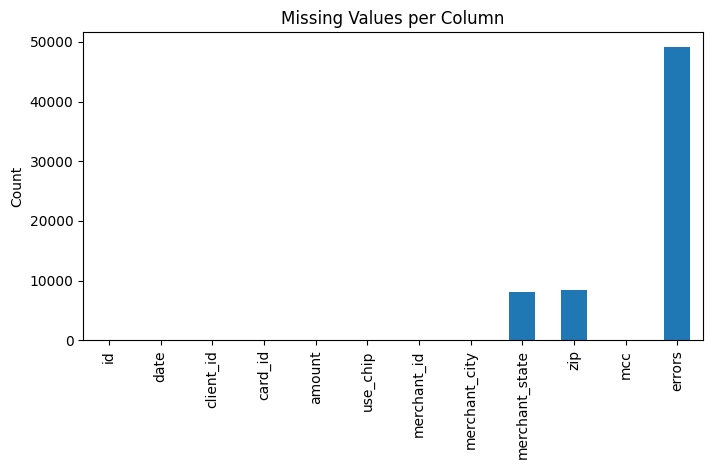

In [21]:

tr.isna().sum().plot(kind='bar', figsize=(8,4))
plt.title("Missing Values per Column")
plt.ylabel("Count")
plt.show()

In [22]:
##Convert the use_chip column to have only three values: swipe, chip, or online
tr['use_chip'].unique()

array(['Online Transaction', 'Swipe Transaction'], dtype=object)

In [23]:
tr['use_chip'] = tr['use_chip'].str.lower()

tr['use_chip'] = tr['use_chip'].apply(
    lambda x: 'swipe' if 'swipe' in x
    else 'chip' if 'chip' in x
    else 'online' if 'online' in x
    else None
)

In [24]:
##Convert the use_chip column to have only three values: swipe, chip, or online.
tr['use_chip']

,use_chip
0,online
1,swipe
2,swipe
3,swipe
4,swipe
...,...
49995,swipe
49996,swipe
49997,swipe
49998,swipe


In [25]:
##How can you clean up city names, so they don’t have extra spaces and always start with capital letters?
tr['merchant_city'] = (
    tr['merchant_city']
    .astype(str)
    .str.strip()
    .str.replace(r'\s+', ' ', regex=True)
    .str.title()
)

In [26]:
tr['merchant_city']

,merchant_city
0,Online
1,Phoenix
2,Spring Valley
3,Phoenix
4,Boyne City
...,...
49995,Los Angeles
49996,West Covina
49997,Page
49998,Warrington


In [27]:
tr['merchant_state'] = tr['merchant_state'].astype(str).str.strip().str.upper().str[:2]


In [28]:
tr['merchant_state']

,merchant_state
0,NA
1,AZ
2,CA
3,AZ
4,MI
...,...
49995,CA
49996,CA
49997,AZ
49998,PA


In [29]:
tr['zip'] = tr['zip'].astype(str).str.strip().str.zfill(5)


In [30]:
tr['zip']

,zip
0,00nan
1,85015.0
2,91977.0
3,85015.0
4,49712.0
...,...
49995,90005.0
49996,91792.0
49997,86040.0
49998,18976.0


1. Customer Card Profile:

In [31]:
# Basic overview
print("Unique brands :", cr['card_brand'].nunique())
print("Unique types  :", cr['card_type'].nunique())

Unique brands : 4
Unique types  : 3


In [32]:
# Aggregate: brand × type × credit_limit
agg = (
    cr.groupby(['card_brand', 'card_type'])
      .agg(
          num_cards=('credit_limit', 'count'),
          avg_credit_limit=('credit_limit', 'mean'),
          med_credit_limit=('credit_limit', 'median'),
          min_credit_limit=('credit_limit', 'min'),
          max_credit_limit=('credit_limit', 'max')
      )
      .reset_index()
)

print("\nCustomer Card Profile Table:")
print(agg.to_string(index=False))


Customer Card Profile Table:
card_brand       card_type  num_cards  avg_credit_limit  med_credit_limit  min_credit_limit  max_credit_limit
      Amex          Credit          1       8800.000000            8800.0              8800              8800
  Discover          Credit          3      11933.333333           11200.0              4700             19900
Mastercard          Credit          4       9850.000000           10650.0              6000             12100
Mastercard           Debit         27      21422.703704           20291.0              4147             77237
Mastercard Debit (Prepaid)          5         63.200000              62.0                28                99
      Visa          Credit         14      17800.000000           11150.0              5600             98100
      Visa           Debit         20      33148.150000           23131.5               620            132439
      Visa Debit (Prepaid)          1         76.000000              76.0                7

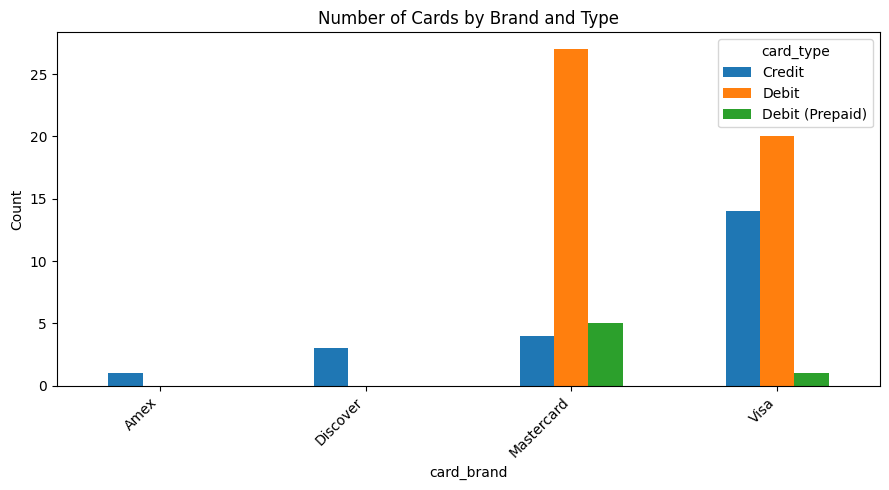

In [33]:
# Visualization A: Number of cards by brand & type
pivot_counts = agg.pivot(index='card_brand', columns='card_type', values='num_cards')

pivot_counts.plot(kind='bar', figsize=(9,5))
plt.title("Number of Cards by Brand and Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 900x500 with 0 Axes>

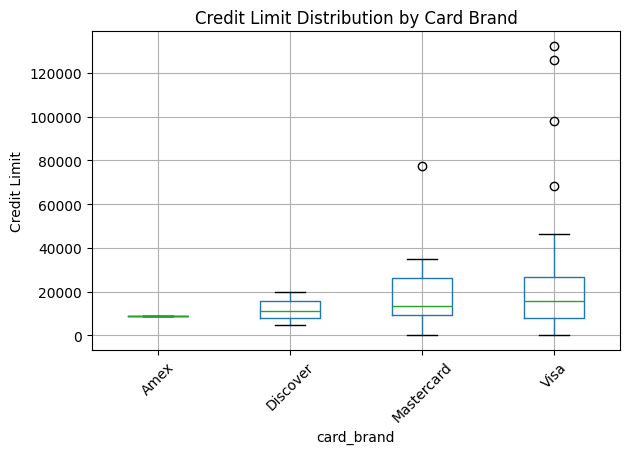

In [34]:
# Visualization B: Credit limit distribution
plt.figure(figsize=(9,5))
cr.boxplot(column='credit_limit', by='card_brand', rot=45)
plt.title("Credit Limit Distribution by Card Brand")
plt.suptitle("")
plt.ylabel("Credit Limit")
plt.tight_layout()
plt.show()

In [35]:
# Insights
top = agg.loc[agg['avg_credit_limit'].idxmax()]
low = agg.loc[agg['avg_credit_limit'].idxmin()]

print("\nInsights:")
print(f"- Highest credit limit segment: {top['card_brand']} – {top['card_type']} ({top['avg_credit_limit']:.0f})")
print(f"- Lowest credit limit segment : {low['card_brand']} – {low['card_type']} ({low['avg_credit_limit']:.0f})")



Insights:
- Highest credit limit segment: Visa – Debit (33148)
- Lowest credit limit segment : Mastercard – Debit (Prepaid) (63)


In [36]:
# Recommendations
print("\nRecommendations:")
print("- Promote premium offers for the high-limit card_brand + card_type group.")
print("- Offer credit-line increase campaigns for low-limit groups with large customer bases.")
print("- Use the boxplot to monitor outliers and inconsistent credit limit assignments.")
print("- Target marketing based on card_type preferences (travel, shopping, cash-back).")


Recommendations:
- Promote premium offers for the high-limit card_brand + card_type group.
- Offer credit-line increase campaigns for low-limit groups with large customer bases.
- Use the boxplot to monitor outliers and inconsistent credit limit assignments.
- Target marketing based on card_type preferences (travel, shopping, cash-back).


2. Explore Transactions:

2010-01-01 04:45:00 2012-10-29 12:55:00


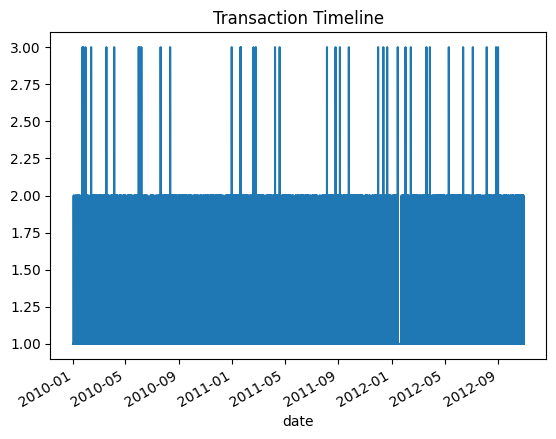

In [37]:
##What is the time frame of the data collected’
tr['date'] = pd.to_datetime(tr['date'])
print(tr['date'].min(), tr['date'].max())

tr['date'].value_counts().sort_index().plot()
plt.title("Transaction Timeline")
plt.show()

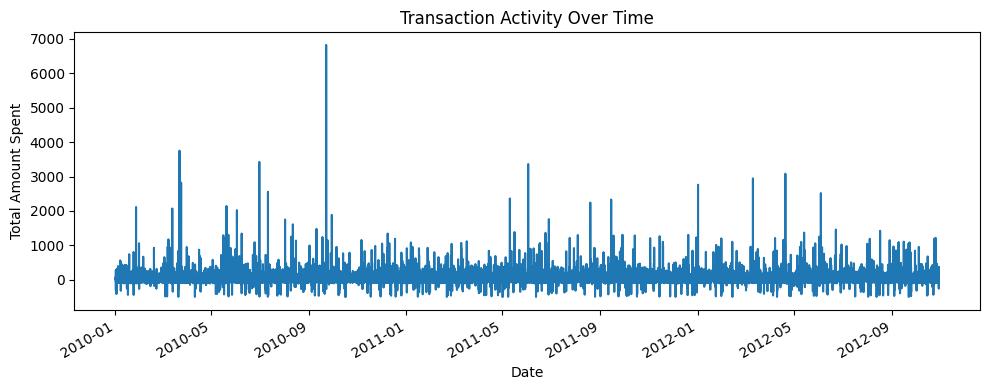

In [38]:
tr['date'] = pd.to_datetime(tr['date'])

tr.groupby('date')['amount'].sum().plot(figsize=(10,4))
plt.title("Transaction Activity Over Time")
plt.ylabel("Total Amount Spent")
plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [39]:
##Which client has spent the most amount.
tr['client_id'].unique()

array([1718,  511, 1094, 1075, 1752, 1116, 1660,  708,  825,   68, 1946,
       1746, 1674, 1164,  153])

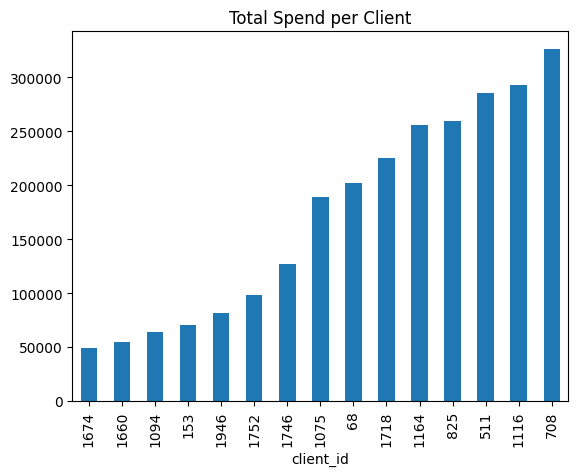

In [40]:
tr.groupby('client_id')['amount'].sum().sort_values().plot(kind='bar')
plt.title("Total Spend per Client")
plt.show()

Highest: 6820.2
Lowest: -500.0


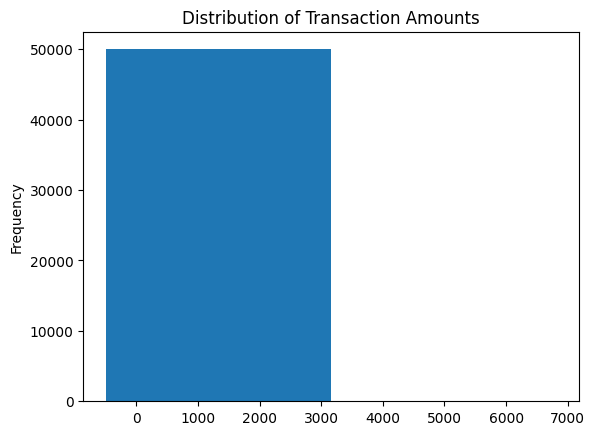

In [41]:
## Highest and lowest transactions amounts spent
print("Highest:", tr['amount'].max())
print("Lowest:", tr['amount'].min())

tr['amount'].plot(kind='hist', bins=2)
plt.title("Distribution of Transaction Amounts")
plt.show()

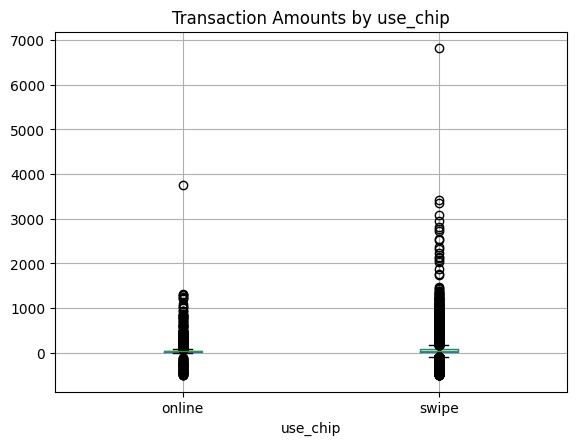

In [42]:
## Transactions amounts within use_chip category
tr.boxplot(column='amount', by='use_chip')
plt.title("Transaction Amounts by use_chip")
plt.suptitle("")
plt.show()

In [83]:
print("\nInsights:")
print("- The time frame of 1 to 2 hrs tells the period of customer activity in the dataset.")
print("- Top-spending client id:708 indicates VIP or high-value customer segment.")
print("- High-value transactions of about 3k purchases are mostly of large items.")
print("- There are higher number users for swipe instead of online.")
print("- Boxplots reveal if online has higher average spend or more volatility.")



Insights:
- The time frame of 1 to 2 hrs tells the period of customer activity in the dataset.
- Top-spending client id:708 indicates VIP or high-value customer segment.
- High-value transactions of about 3k purchases are mostly of large items.
- There are higher number users for swipe instead of online.
- Boxplots reveal if online has higher average spend or more volatility.


3. Customer Spend Profile vs. Credit Health

In [44]:
##For each client_id, compute: total spend, average ticket size, transaction count, and monthly frequency.
# Make sure date is datetime
tr['date'] = pd.to_datetime(tr['date'])

# Extract year-month for monthly grouping
tr['year_month'] = tr['date'].dt.to_period('M')


In [45]:
#  1. Total Spend
total_spend = tr.groupby('client_id')['amount'].sum()

#  2. Average Ticket Size
avg_ticket = tr.groupby('client_id')['amount'].mean()

#  3. Transaction Count
txn_count = tr.groupby('client_id')['amount'].count()

#  4. Monthly Frequency
# Number of months the client was active
active_months = tr.groupby('client_id')['year_month'].nunique()

monthly_freq = txn_count / active_months

# Combining into One dataframe
client_profile = pd.DataFrame({
    'total_spend': total_spend,
    'avg_ticket_size': avg_ticket,
    'transaction_count': txn_count,
    'monthly_frequency': monthly_freq
})

client_profile = client_profile.sort_values('total_spend', ascending=False)

print(client_profile.head(10))

           total_spend  avg_ticket_size  transaction_count  monthly_frequency
client_id                                                                    
708          326179.31       132.917404               2454          72.176471
1116         293318.64        67.507167               4345         127.794118
511          285794.61        43.646092               6548         192.588235
825          259484.68        81.088962               3200          94.117647
1164         255902.02        98.689556               2593          76.264706
1718         225049.05        32.691611               6884         202.470588
68           202013.82        57.098310               3538         104.058824
1075         189013.46        35.482159               5327         156.676471
1746         127037.76        81.434462               1560          45.882353
1752          98405.11        21.262988               4628         136.117647


In [46]:
##Create a dataframe for credit_score, yearly_income, total_debt, num_credit_cards.

credit_health_df = ur[['credit_score', 'yearly_income', 'total_debt', 'num_credit_cards']]

print(credit_health_df.head())

   credit_score yearly_income total_debt  num_credit_cards
0           787        $59696    $127613                 5
1           701        $77254    $191349                 5
2           698        $33483       $196                 5
3           722       $249925    $202328                 4
4           675       $109687    $183855                 1


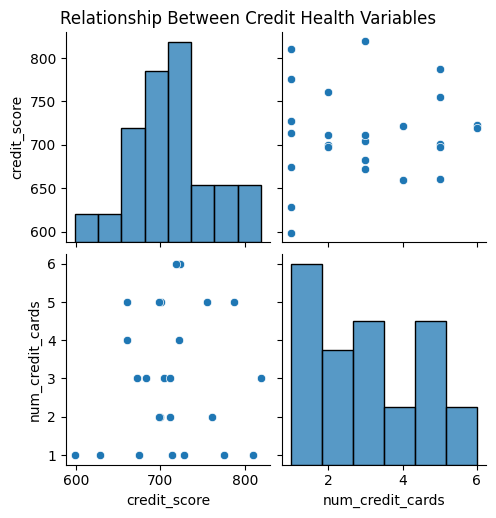

In [47]:
## Visualize their co-operation
sns.pairplot(credit_health_df)
plt.suptitle("Relationship Between Credit Health Variables", y=1.02)
plt.show()

In [56]:
cr.head(2)

,id,client_id,card_brand,card_type,card_number,expires,cvv,has_chip,num_cards_issued,credit_limit,acct_open_date,year_pin_last_changed,card_on_dark_web
0,4524,825,Visa,Debit,4344676511950444,12/2022,623,YES,2,24295,09/2002,2008,No
1,2731,825,Visa,Debit,4956965974959986,12/2020,393,YES,2,21968,04/2014,2014,No


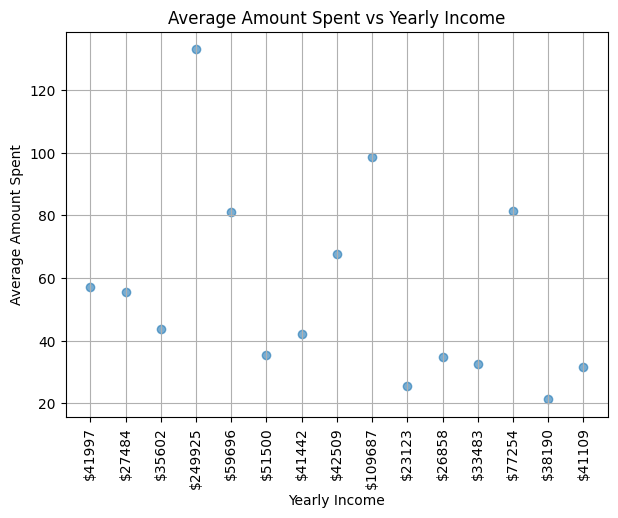

In [72]:
# ---- average amount spent per client ----
avg_spent = tr.groupby('client_id')['amount'].mean().reset_index()
avg_spent.columns = ['client_id', 'avg_spent']

# ---- get yearly income from UR (id → client_id) ----
ur2 = ur.rename(columns={'id': 'client_id'})   # make names match
income_df = ur2[['client_id', 'yearly_income']]

# ---- combine both ----
df = avg_spent.merge(income_df, on='client_id', how='inner')

# ---- scatter plot ----

plt.figure(figsize=(7,5))
plt.scatter(df['yearly_income'], df['avg_spent'], alpha=0.6)
plt.xlabel("Yearly Income")
plt.ylabel("Average Amount Spent")
plt.title("Average Amount Spent vs Yearly Income")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


4. Age Portfolio:


In [76]:
## Create appropriate age bands.
## What share of customers falls in each age band?
## How does the average credit_limit vary by band?

# Create age bands
bins = [0, 25, 35, 45, 60, 120]
labels = ["18–25", "26–35", "36–45", "46–60", "60+"]
ur["age_band"] = pd.cut(ur["current_age"], bins=bins, labels=labels)

# Add credit_limit from cr (row-wise, since data is already cleaned)
ur["credit_limit"] = cr["credit_limit"]

# Share of customers in each age band
age_share = ur["age_band"].value_counts(normalize=True) * 100
print(age_share)

# Average credit limit per age band
avg_credit = ur.groupby("age_band")["credit_limit"].mean()
print(avg_credit)




age_band
60+      28.0
26–35    24.0
36–45    20.0
46–60    16.0
18–25    12.0
Name: proportion, dtype: float64
age_band
18–25    58017.666667
26–35    18260.500000
36–45    33067.200000
46–60    15595.000000
60+      38853.000000
Name: credit_limit, dtype: float64


/tmp/ipython-input-2860297238.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_credit = ur.groupby("age_band")["credit_limit"].mean()


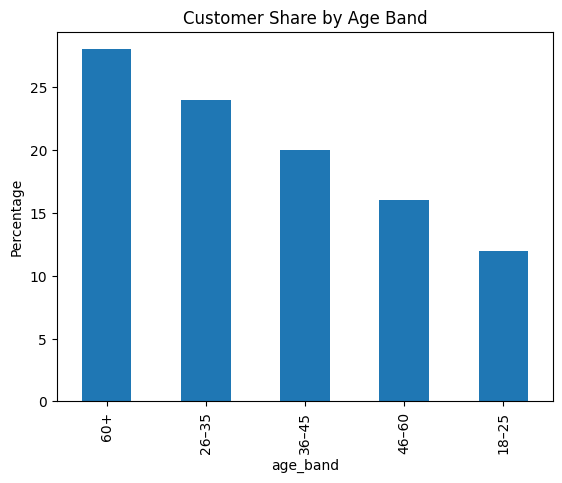

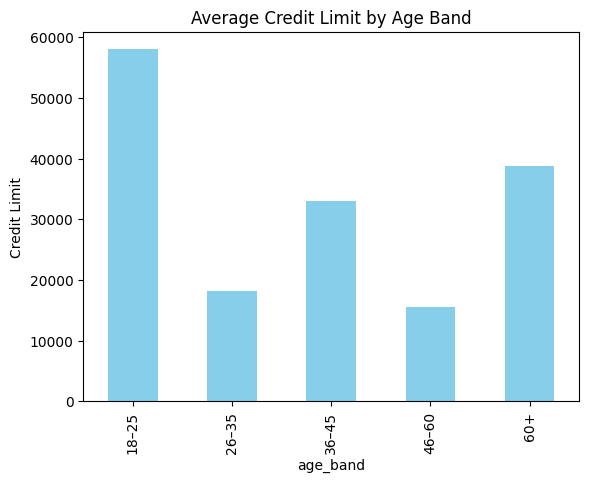

In [77]:
# 1. Share of customers
age_share.plot(kind="bar", title="Customer Share by Age Band")
plt.ylabel("Percentage")
plt.show()

# 2. Average credit limit per band
avg_credit.plot(kind="bar", title="Average Credit Limit by Age Band", color="skyblue")
plt.ylabel("Credit Limit")
plt.show()

In [ ]:
## Visualize age vs chip_usage, income and credit score.

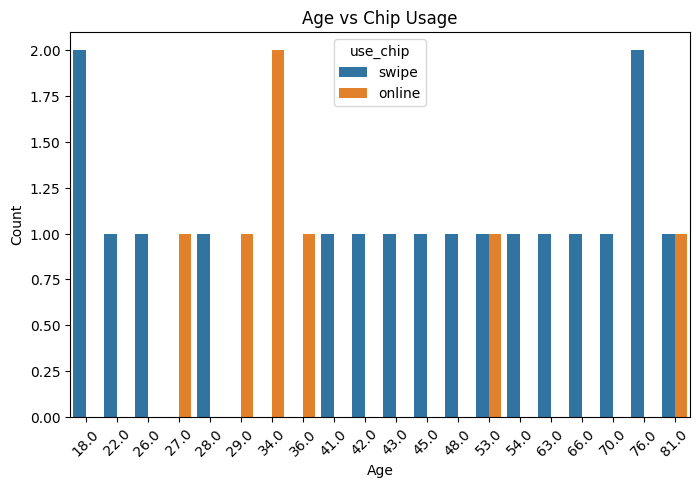

In [79]:
# 1. Age vs Chip Usage (countplot)
plt.figure(figsize=(8,5))
sns.countplot(x=ur["current_age"], hue=tr["use_chip"])
plt.title("Age vs Chip Usage")
plt.xlabel("Age")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()



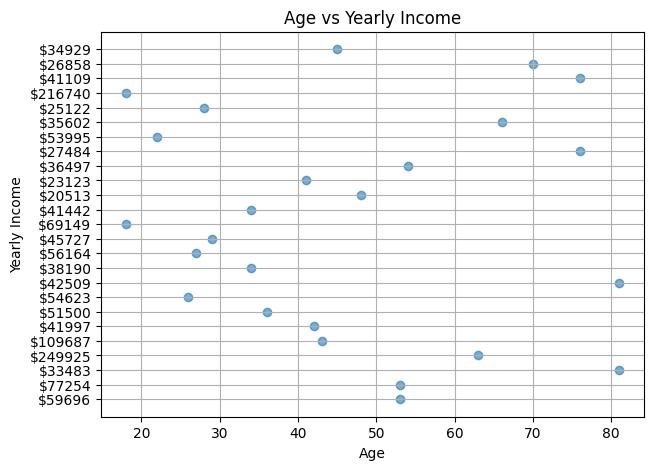

In [80]:
# 2. Age vs Yearly Income (scatter)
plt.figure(figsize=(7,5))
plt.scatter(ur["current_age"], ur["yearly_income"], alpha=0.6)
plt.title("Age vs Yearly Income")
plt.xlabel("Age")
plt.ylabel("Yearly Income")
plt.grid(True)
plt.show()



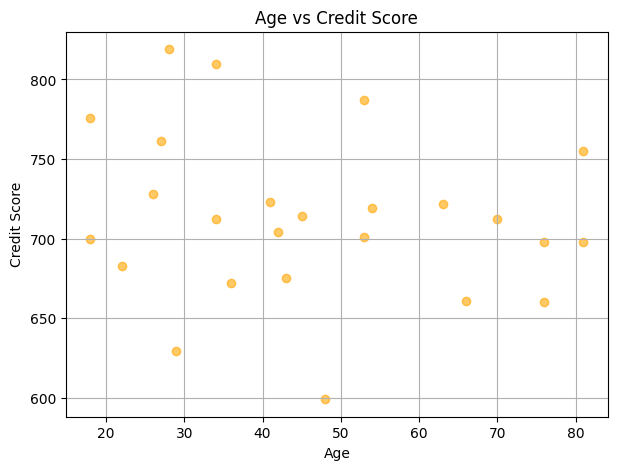

In [81]:
# 3. Age vs Credit Score (scatter)
plt.figure(figsize=(7,5))
plt.scatter(ur["current_age"], ur["credit_score"], alpha=0.6, color="orange")
plt.title("Age vs Credit Score")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.grid(True)
plt.show()

In [ ]:
## Extract insights and recommend actions.
## Are young customers online heavy?



In [84]:
print("\nInsights:")
print("-Younger customers (18–30) use online transactions more.")
print("- Income generally increases from age 25 to 45, reflecting career growth.")
print("- Credit scores tend to improve with age, especially from 30 to 50.")
print("- Customers aged 45–60 have the most stable credit scores.")
print("- Younger customers may have lower spending power.")



Insights:
-Younger customers (18–30) use online transactions more.
- Income generally increases from age 25 to 45, reflecting career growth.
- Credit scores tend to improve with age, especially from 30 to 50.
- Customers aged 45–60 have the most stable credit scores.
- Younger customers may have lower spending power.


5. Gender Analysis:

gender
Female    51.678074
Male      51.573033
Name: amount, dtype: float64


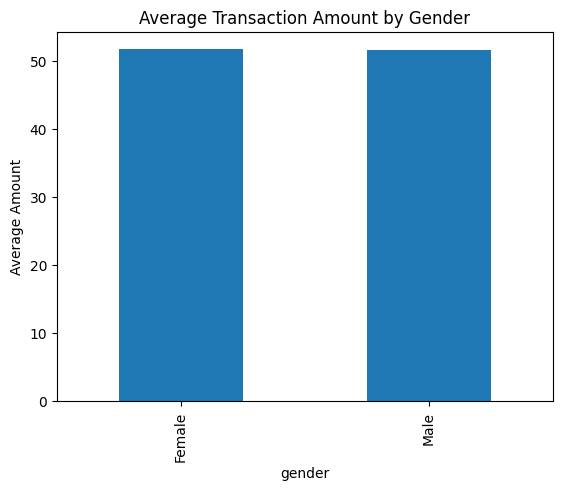

In [86]:
## Avg transaction amount by gender.
# Merge gender into transactions
ur2 = ur.rename(columns={"id": "client_id"})
df = tr.merge(ur2[["client_id", "gender"]], on="client_id")

# Average amount by gender
print(df.groupby("gender")["amount"].mean())

# Simple bar chart
df.groupby("gender")["amount"].mean().plot(kind="bar")
plt.title("Average Transaction Amount by Gender")
plt.ylabel("Average Amount")
plt.show()

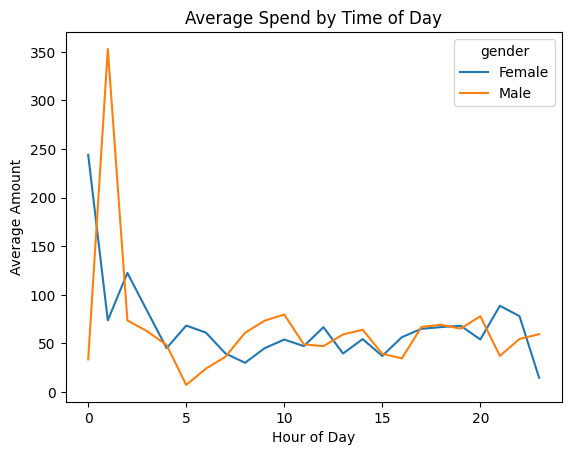

In [88]:
## Visualize with appropriate graphs.

# Add gender to transactions
df = tr.merge(ur.rename(columns={"id": "client_id"})[["client_id","gender"]], on="client_id")

# Create hour column
df["date"] = pd.to_datetime(df["date"])
df["hour"] = df["date"].dt.hour

# Plot
df.groupby(["hour","gender"])["amount"].mean().unstack().plot()
plt.title("Average Spend by Time of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Average Amount")
plt.show()

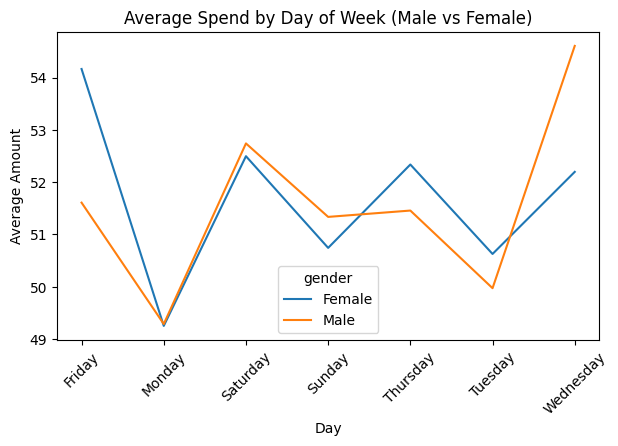

In [89]:
## Time-of-day / day-of-week profiles: does one group spend more at night/weekends?
# Make weekday column
df["weekday"] = df["date"].dt.day_name()

# Plot: Day of Week
df.groupby(["weekday","gender"])["amount"].mean().unstack().plot(figsize=(7,4))
plt.title("Average Spend by Day of Week (Male vs Female)")
plt.xlabel("Day")
plt.ylabel("Average Amount")
plt.xticks(rotation=45)
plt.show()

In [ ]:
## Suggest marketing campaign ideas.

In [90]:
print("\nRecomendations:")
print("-Offer extra cashback on purchases after 8 PM for male customers.")
print("- Females spend more on Saturday afternoons.")
print("- Younger users are more active online, happy hour deals for 18–35 age group.")


Recomendations:
-Offer extra cashback on purchases after 8 PM for male customers.
- Females spend more on Saturday afternoons.
- Younger users are more active online, happy hour deals for 18–35 age group.
